In [1]:
import tensorflow

In [2]:
from models import random_forest_model, rnn_model, cnn_rnn_model
from processing import general_processing, bayes_classification_processing, rnn_classification_processing
from postmodeling import precision_plot, recall_plot, probability_overview
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import shap


In [3]:
dt = pd.read_pickle('data/imported_audio_original.pkl')
dt = dt[dt.esc10].reset_index()
dt = general_processing(dt)


In [4]:
dt[dt.train == 0]

,index,filename,audio,train,fold,target,category,esc10,src_file,take
300,300,3-152007-A-20.wav,<20/3-152007-A-20.wav>,0,3,20,crying_baby,True,152007,A
301,301,5-185579-B-41.wav,<41/5-185579-B-41.wav>,0,5,41,chainsaw,True,185579,B
302,302,3-157615-A-10.wav,<10/3-157615-A-10.wav>,0,3,10,rain,True,157615,A
303,303,4-171519-A-21.wav,<21/4-171519-A-21.wav>,0,4,21,sneezing,True,171519,A
304,304,3-140774-A-10.wav,<10/3-140774-A-10.wav>,0,3,10,rain,True,140774,A
...,...,...,...,...,...,...,...,...,...,...
395,395,5-171653-A-41.wav,<41/5-171653-A-41.wav>,0,5,41,chainsaw,True,171653,A
396,396,4-194711-A-38.wav,<38/4-194711-A-38.wav>,0,4,38,clock_tick,True,194711,A
397,397,5-186924-A-12.wav,<12/5-186924-A-12.wav>,0,5,12,crackling_fire,True,186924,A
398,398,5-220026-A-21.wav,<21/5-220026-A-21.wav>,0,5,21,sneezing,True,220026,A


In [5]:
X_train, y_train = bayes_classification_processing(dt[dt.train == 1])
X_test, y_test = bayes_classification_processing(dt[dt.train == 0].reset_index(drop=True))


In [6]:
param_grid = {'max_depth': [None, 10, 20, 30],
                    'n_estimators': [10, 50, 100, 200]} 

In [7]:
model_dict = {}

columns_model = X_train.filter(regex='^mfcc_').columns
model = random_forest_model(X_train, y_train, X_test, y_test, variables=columns_model, param_grid=param_grid)
model_dict['rf_mfcc'] = copy.deepcopy(model)

columns_model = X_train.filter(regex='^mfcc_|^zcr').columns
model = random_forest_model(X_train, y_train, X_test, y_test, variables=columns_model, param_grid=param_grid)
model_dict['rf_mfcc_zcr_'] = copy.deepcopy(model)

columns_model = X_train.filter(regex='^mfcc_avg_|^mfcc_std_|^zcr|^energy').columns
model = random_forest_model(X_train, y_train, X_test, y_test, variables=columns_model, param_grid=param_grid)
model_dict['rf_mfcc_zcr_energy'] = copy.deepcopy(model)

columns_model = X_train.filter(regex='^mfcc_avg_|^mfcc_std_|^zcr|^energy|^delta_mfcc').columns
model = random_forest_model(X_train, y_train, X_test, y_test, variables=columns_model, param_grid=param_grid)
model_dict['rf_mfcc_zcr_energy_delta'] = copy.deepcopy(model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.


[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................

The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_es

The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_es

The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_es

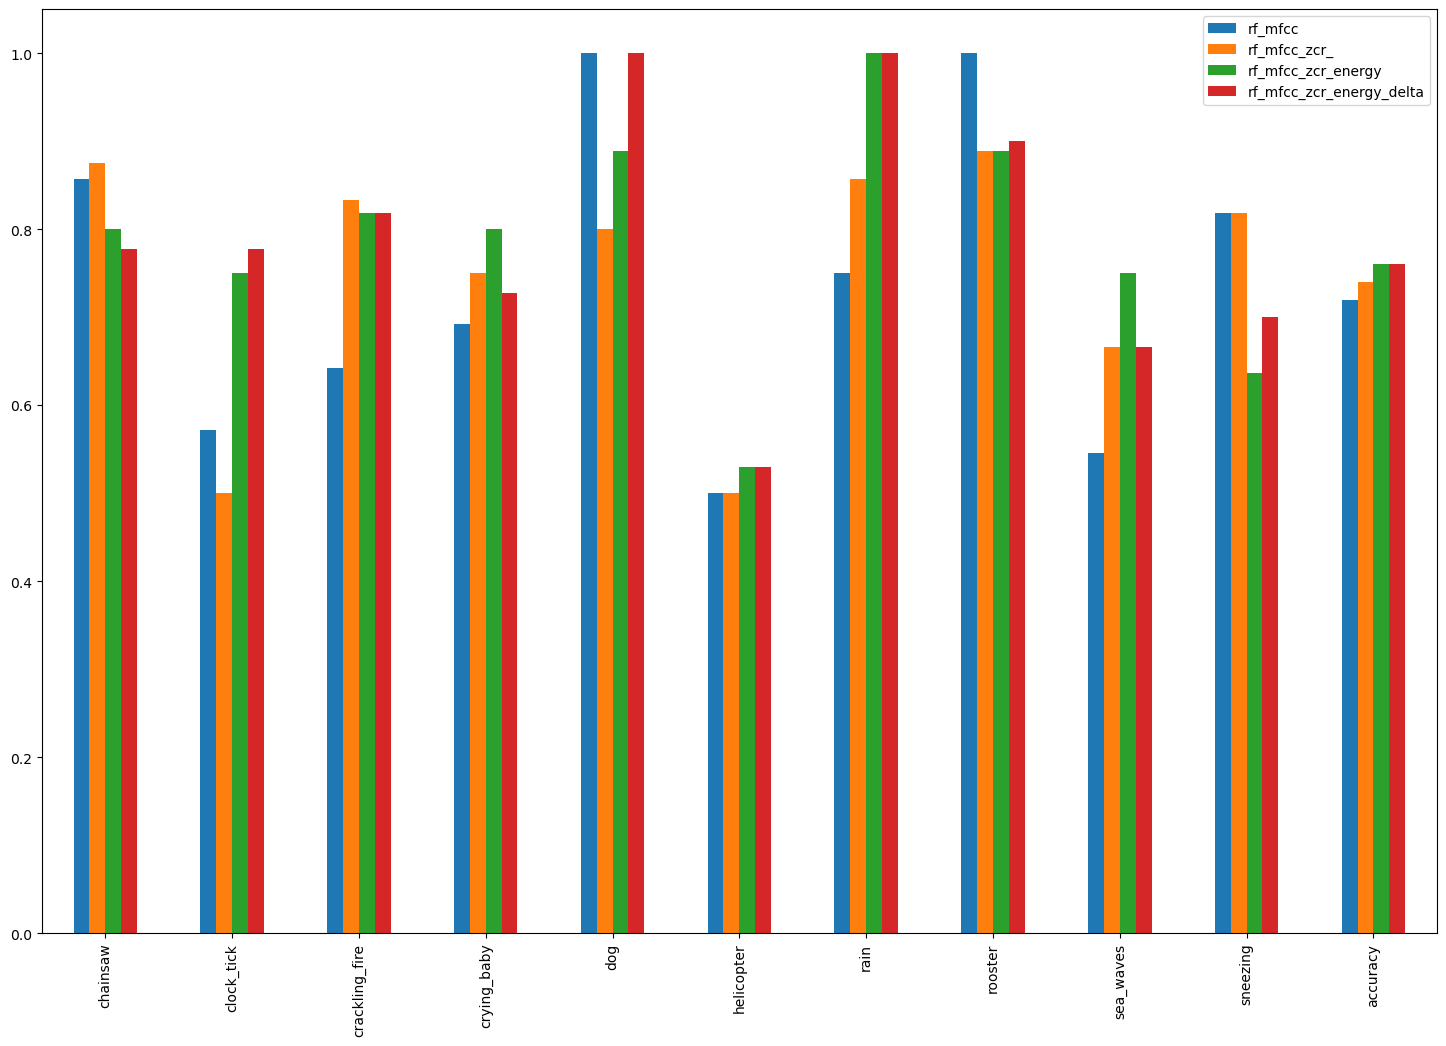

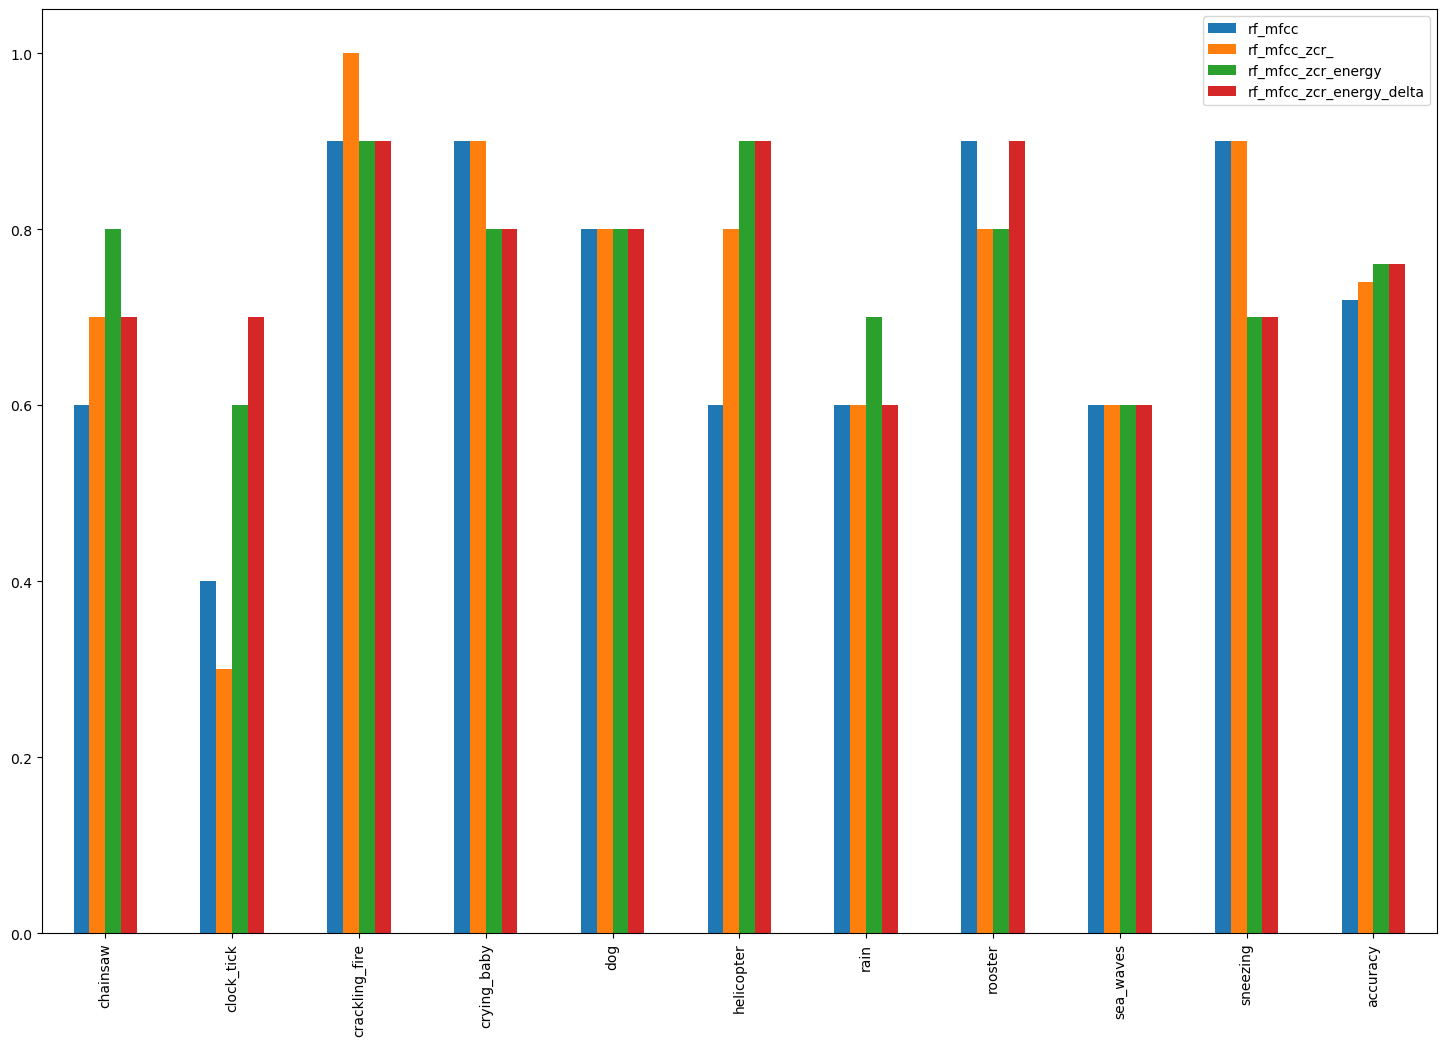

In [8]:
precision_plot(model_dict, figsize=(18,12))
recall_plot(model_dict, figsize=(18,12))

In [9]:
model_dict['rf_mfcc_zcr_energy']['classification_rep']['accuracy']

0.76

In [10]:
classes = model_dict['rf_mfcc_zcr_energy']['model'].classes_


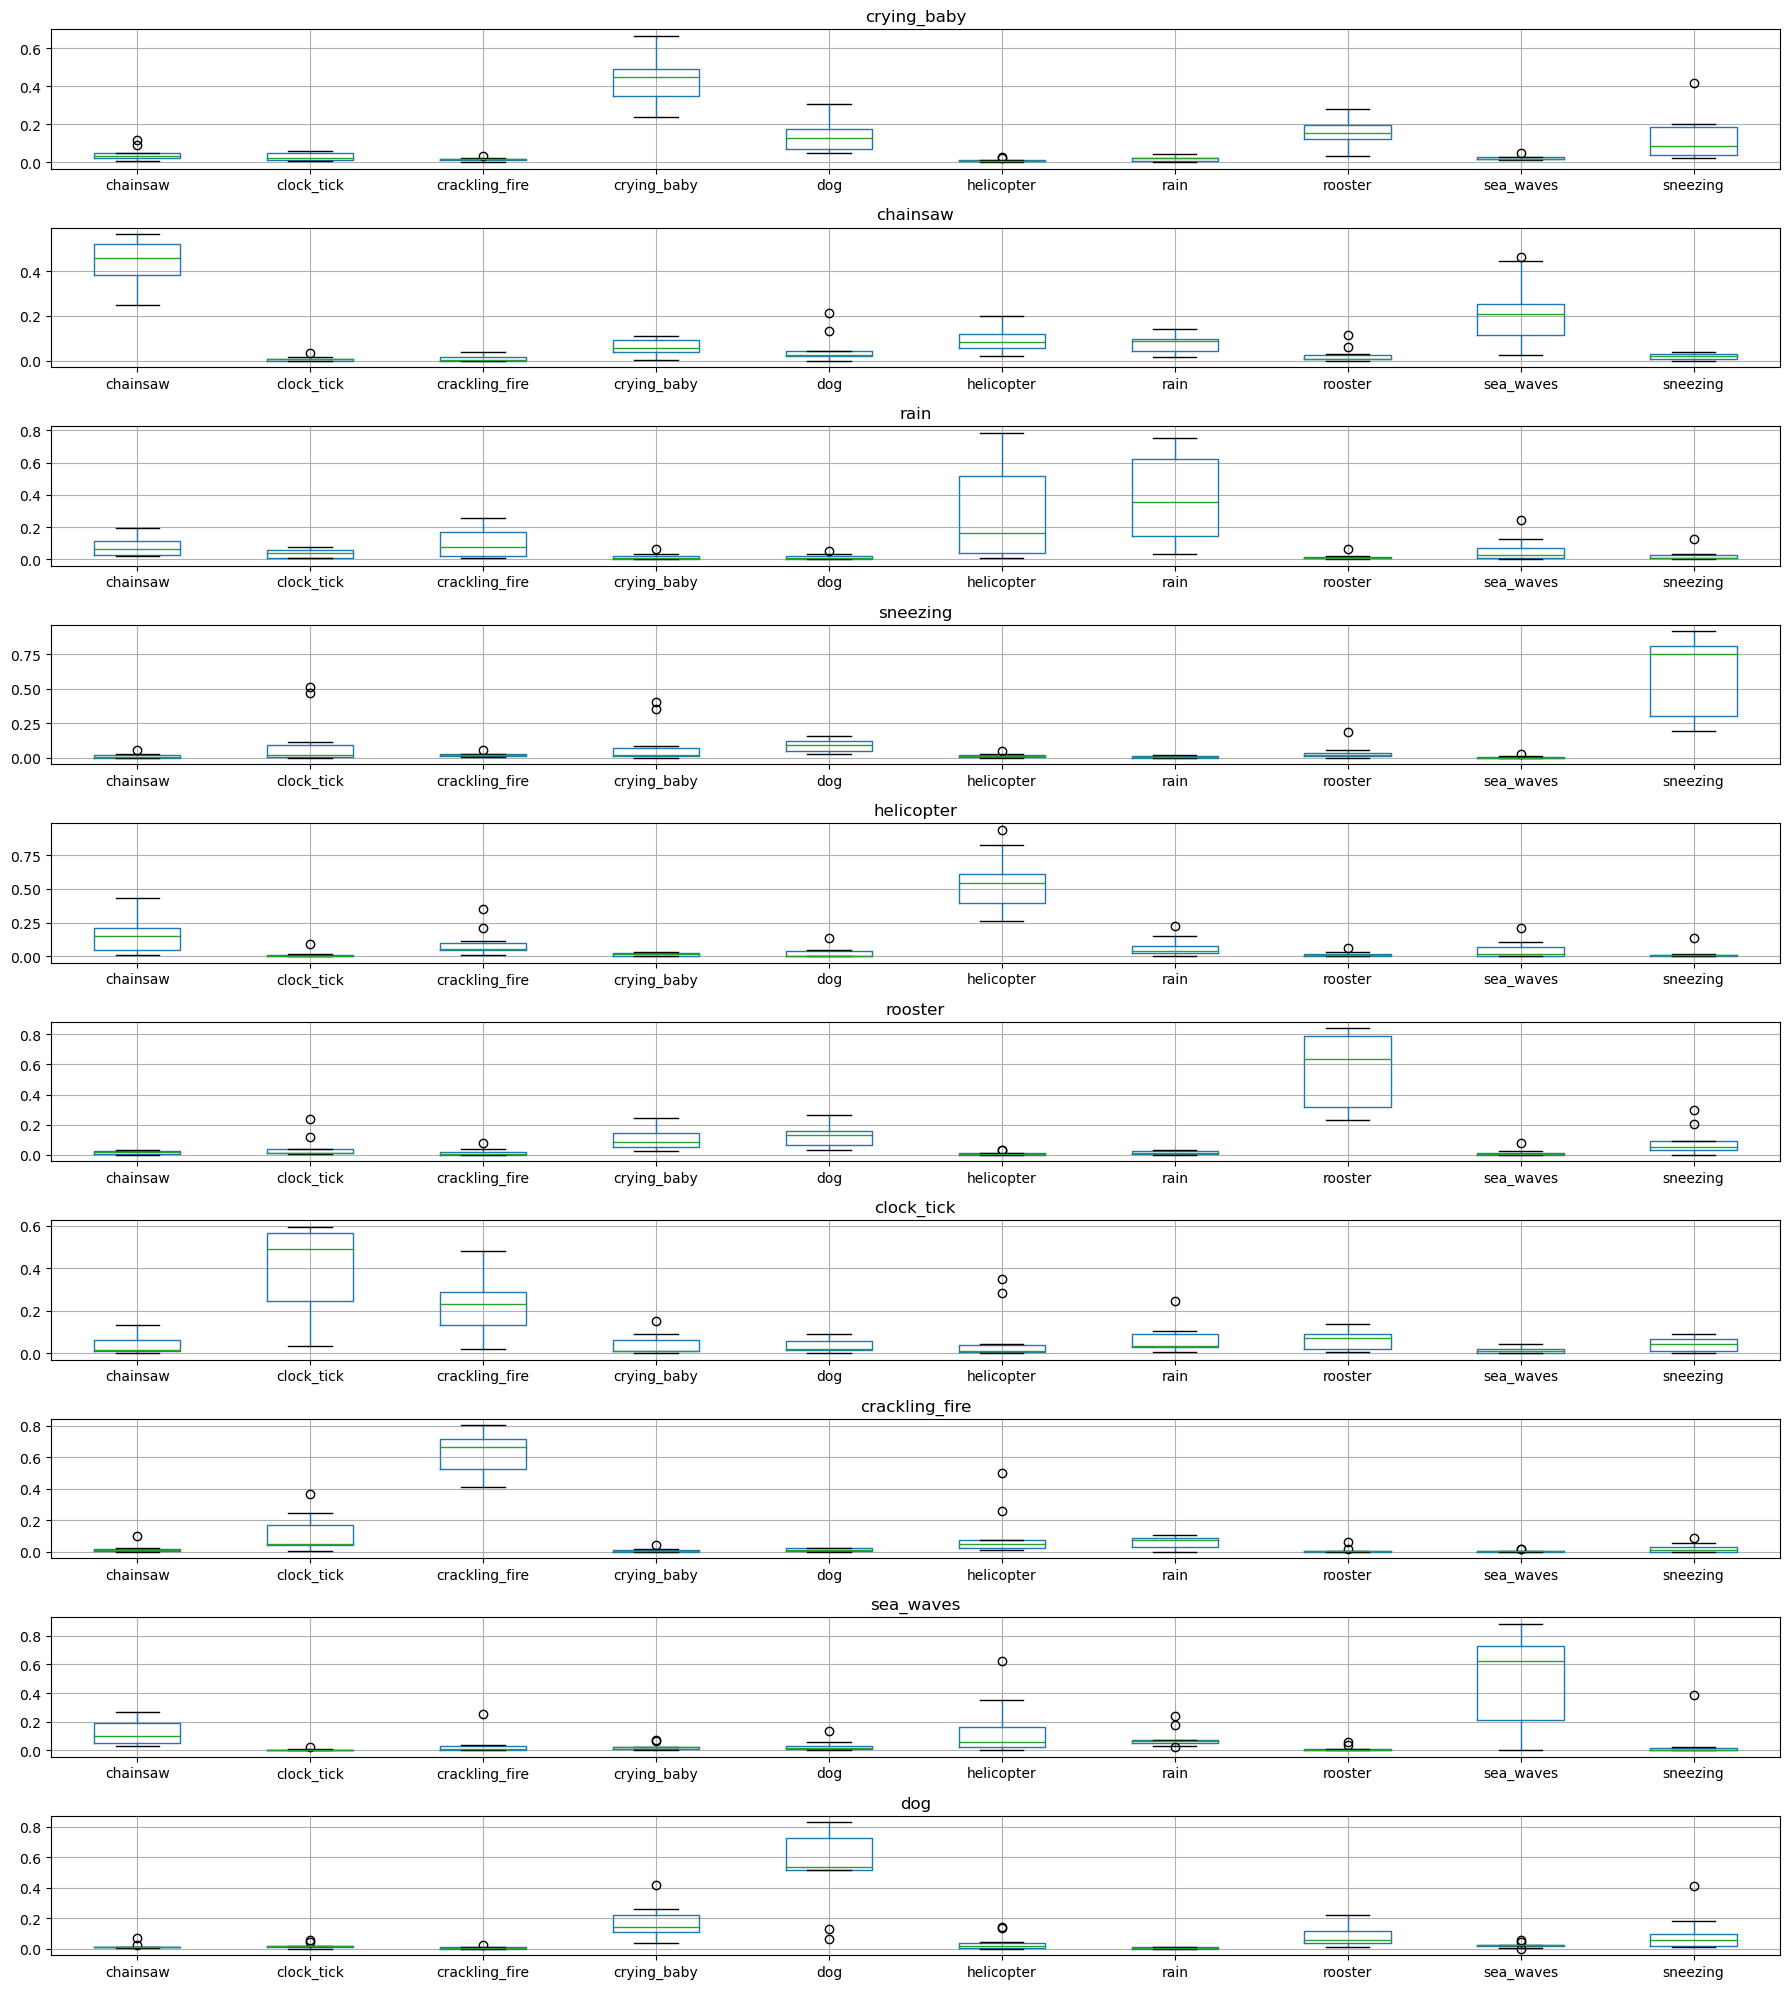

In [11]:

probability_overview(model_dict['rf_mfcc_zcr_energy'], classes, figsize=(18, 20))

In [12]:
trex = shap.TreeExplainer(model_dict['rf_mfcc_zcr_energy']['model'])

In [13]:
shap_values = trex.shap_values(model_dict['rf_mfcc_zcr_energy']['X_test'])

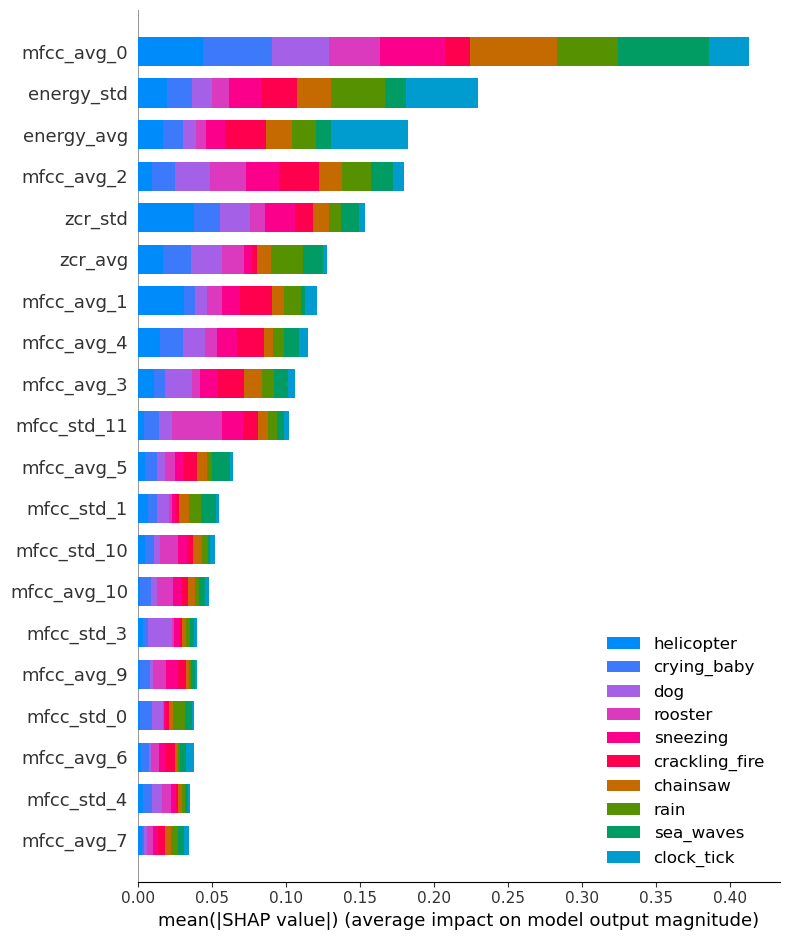

In [14]:
shap.summary_plot(shap_values, model_dict['rf_mfcc_zcr_energy']['X_test'], class_names = classes)

In [15]:
X_train, y_train = rnn_classification_processing(dt[dt.train == 0].reset_index(drop=True))
X_test, y_test = rnn_classification_processing(dt[dt.train == 1].reset_index(drop=True))


In [16]:
output_dict = rnn_model(X_train,y_train, X_test, y_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73216     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

2023-01-31 22:17:24.655624: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 2s 465ms/step - loss: 2.3178 - acc: 0.0933 - val_loss: 2.2930 - val_acc: 0.2000
Epoch 2/50
2/2 [==============================] - 0s 213ms/step - loss: 2.3121 - acc: 0.0933 - val_loss: 2.2628 - val_acc: 0.2400
Epoch 3/50
2/2 [==============================] - 0s 225ms/step - loss: 2.2440 - acc: 0.1733 - val_loss: 2.2288 - val_acc: 0.2800
Epoch 4/50
2/2 [==============================] - 0s 220ms/step - loss: 2.2500 - acc: 0.0933 - val_loss: 2.1966 - val_acc: 0.2800
Epoch 5/50
2/2 [==============================] - 0s 216ms/step - loss: 2.1599 - acc: 0.2400 - val_loss: 2.1634 - val_acc: 0.3200
Epoch 6/50
2/2 [==============================] - 0s 235ms/step - loss: 2.1929 - acc: 0.2267 - val_loss: 2.1308 - val_acc: 0.3200
Epoch 7/50
2/2 [==============================] - 0s 211ms/step - loss: 2.1574 - acc: 0.2133 - val_loss: 2.1023 - val_acc: 0.3200
Epoch 8/50
2/2 [==============================] - 0s 218ms/step - loss: 2.1837 - acc: 0.2000 - val_lo

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [17]:
output_dict['history'].history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

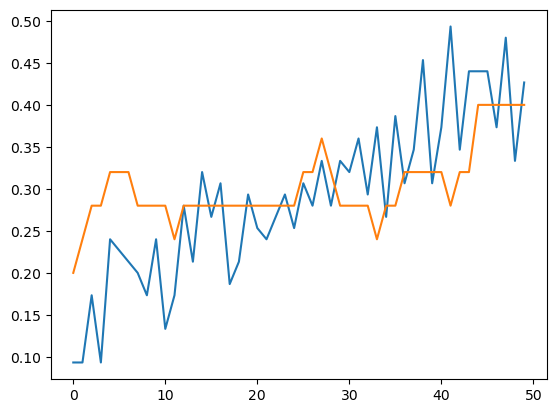

In [18]:
fig, ax = plt.subplots()
ax.plot(output_dict['history'].history['acc'])
ax.plot(output_dict['history'].history['val_acc'])


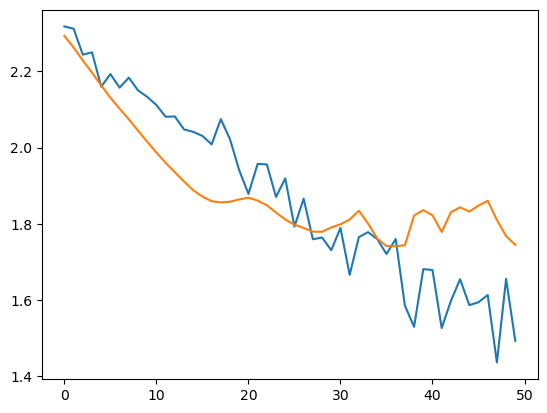

In [19]:
fig, ax = plt.subplots()
ax.plot(output_dict['history'].history['loss'])
ax.plot(output_dict['history'].history['val_loss'])

In [20]:
model_dict['lstm'] = output_dict

In [21]:
model_prob_plot = {k:v for k, v in model_dict.items() if k in ['rf_mfcc', 'rf_mfcc_zcr_', 'rf_mfcc_zcr_energy', 'rf_mfcc_zcr_energy_delta', 'lstm']}

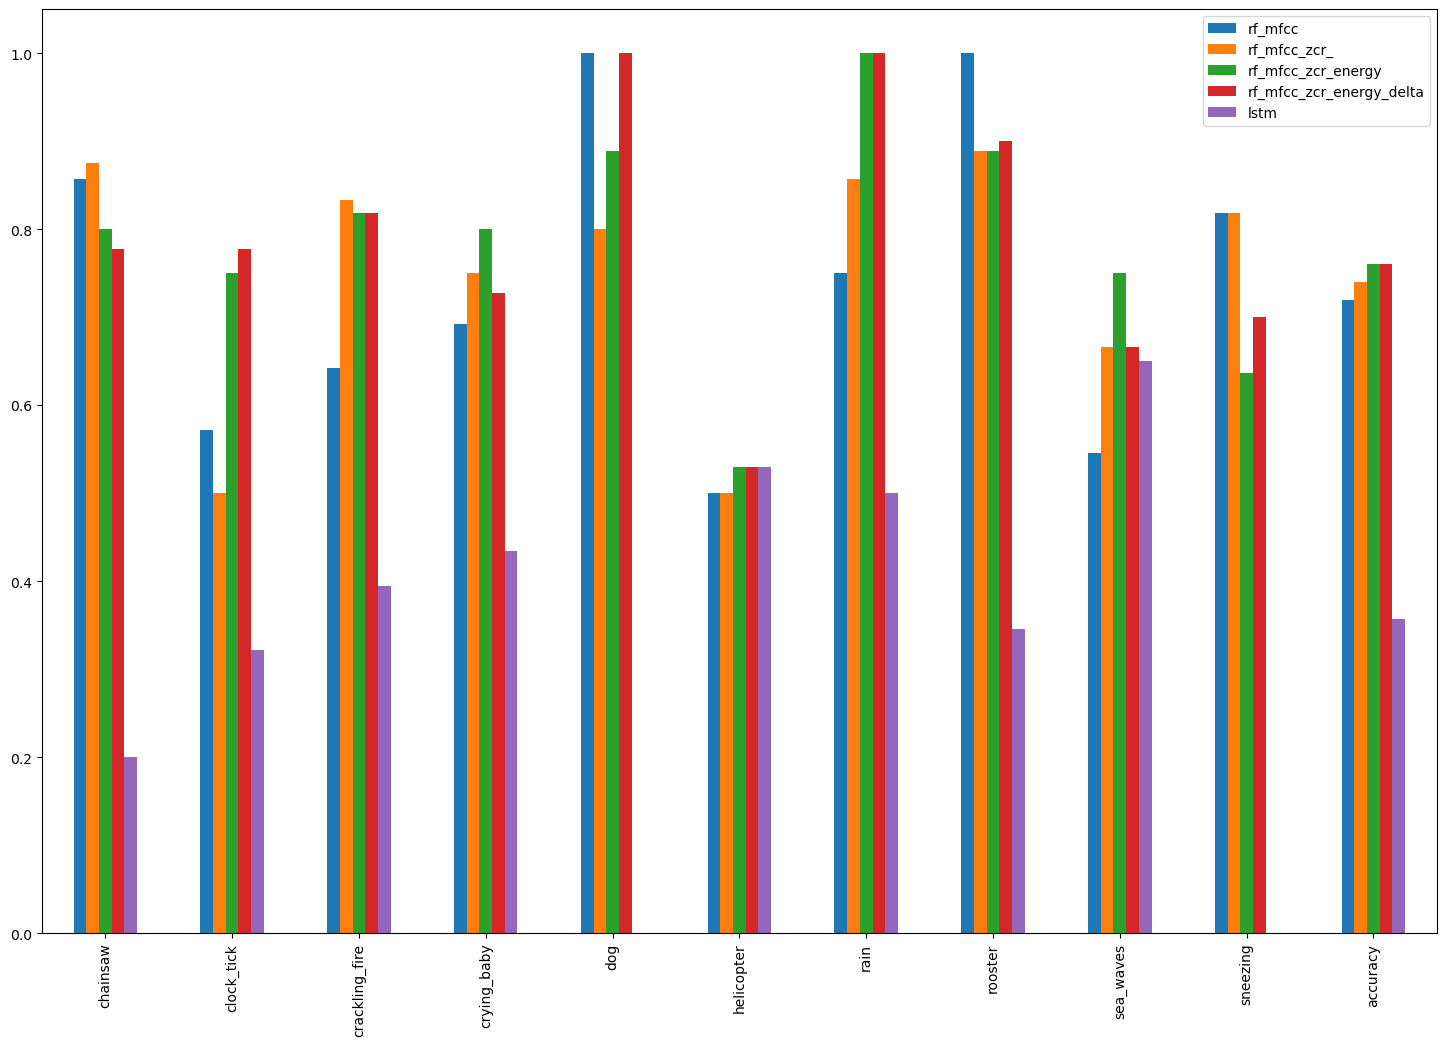

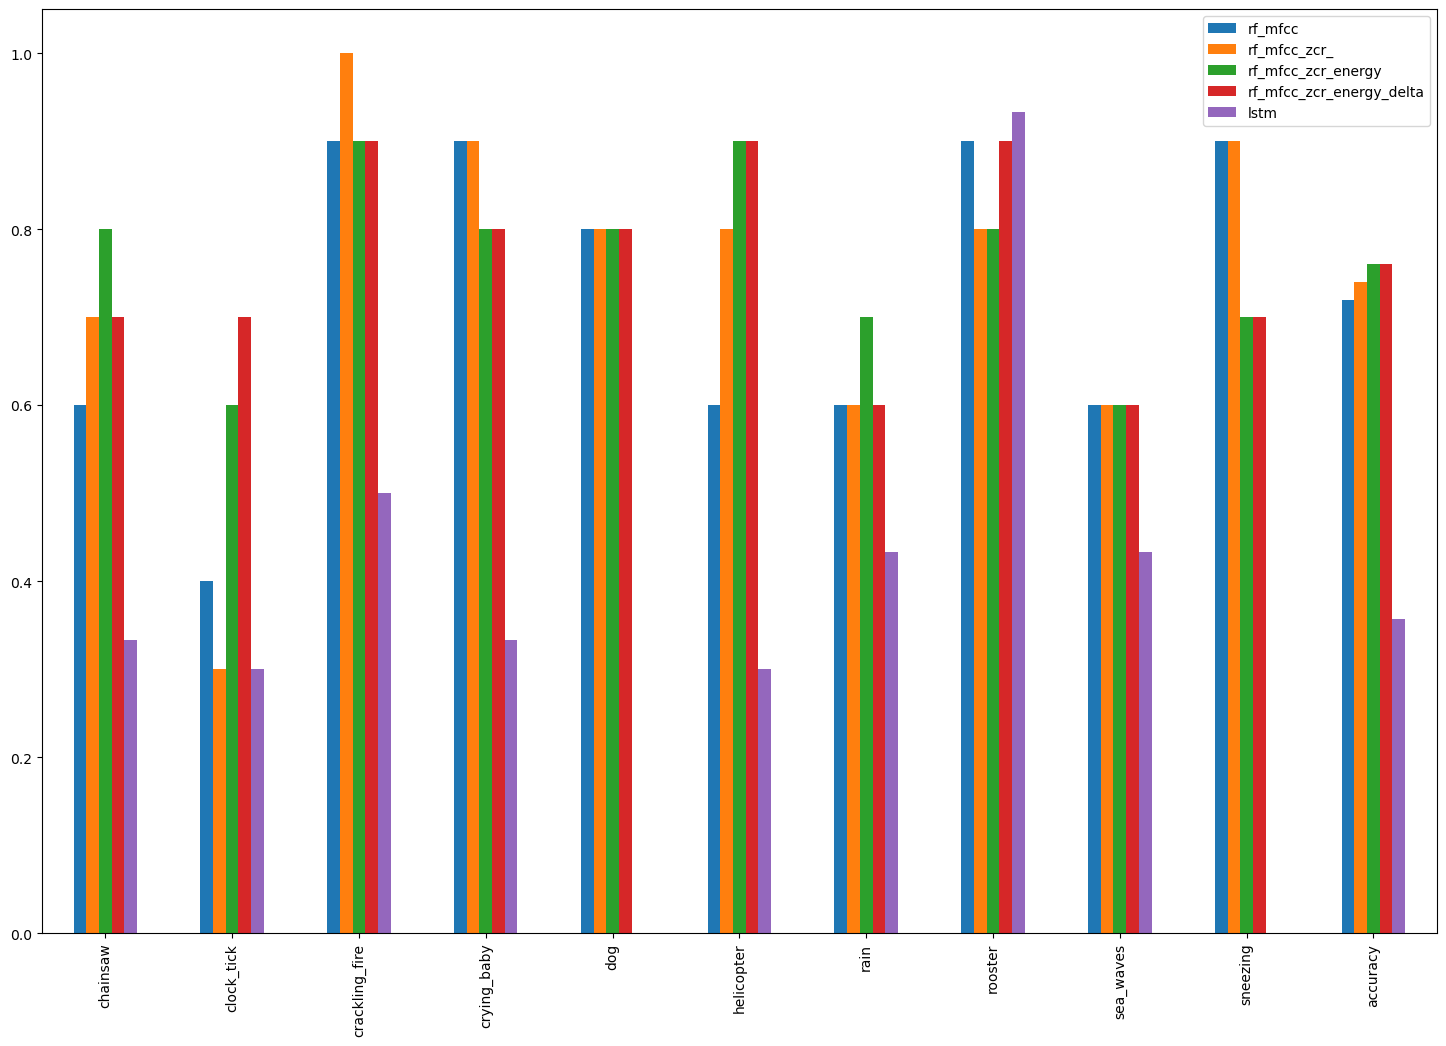

In [22]:
precision_plot(model_prob_plot, figsize=(18, 12))
recall_plot(model_prob_plot, figsize=(18, 12))

## CNN LSTM

In [23]:
output_dict = cnn_rnn_model(X_train,y_train, X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 417, 64)           13504     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 52, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [24]:
model_dict['cnn_lstm_augmented'] = output_dict

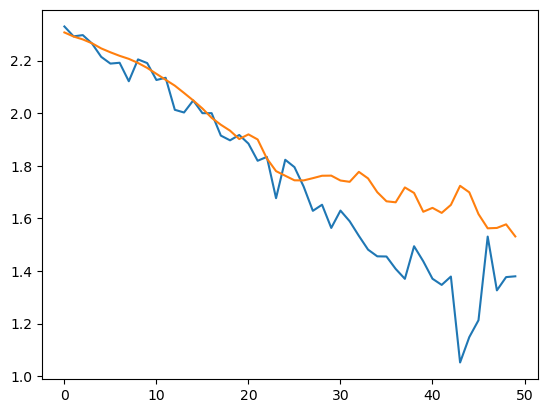

In [25]:
fig, ax = plt.subplots()
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['loss'])
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['val_loss'])

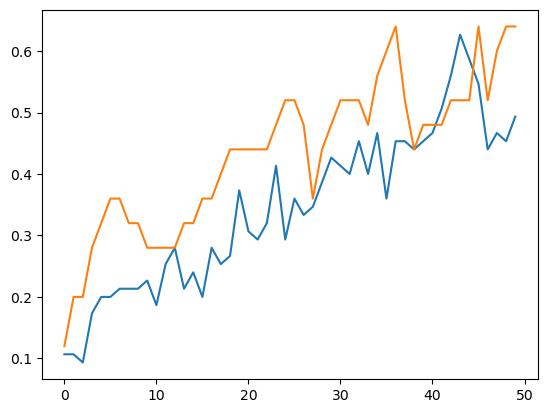

In [26]:
fig, ax = plt.subplots()
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['acc'])
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['val_acc'])

In [27]:
dt_augmented = pd.read_pickle('data/imported_audio_original.pkl')
dt_augmented = dt_augmented[dt_augmented.esc10].reset_index()
dt_augmented = general_processing(dt_augmented)


In [28]:
X_train, y_train = rnn_classification_processing(dt_augmented[dt_augmented.train == 0].reset_index(drop=True))
X_test, y_test = rnn_classification_processing(dt_augmented[dt_augmented.train == 1].reset_index(drop=True))

In [29]:
output_dict = rnn_model(X_train,y_train, X_test, y_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               73216     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
 dropout_8 (Dropout)         (None, 24)                0         
                                                                 
 dense_8 (Dense)             (None, 10)               

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [30]:
model_dict['lstm_augmented'] = output_dict

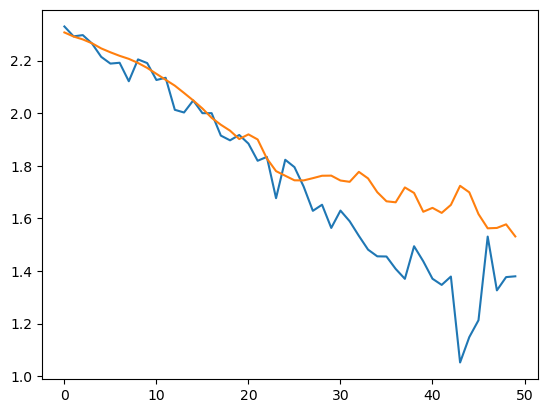

In [31]:
fig, ax = plt.subplots()
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['loss'])
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['val_loss'])

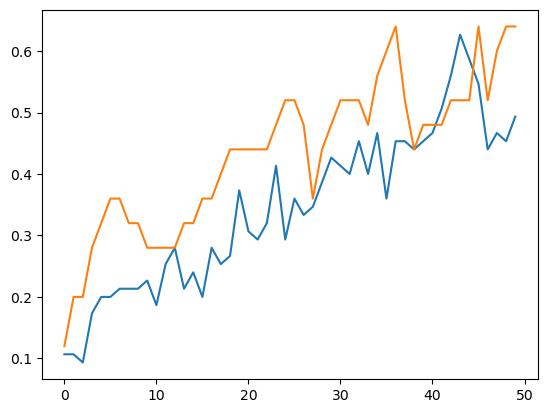

In [32]:
fig, ax = plt.subplots()
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['acc'])
ax.plot(model_dict['cnn_lstm_augmented']['history'].history['val_acc'])

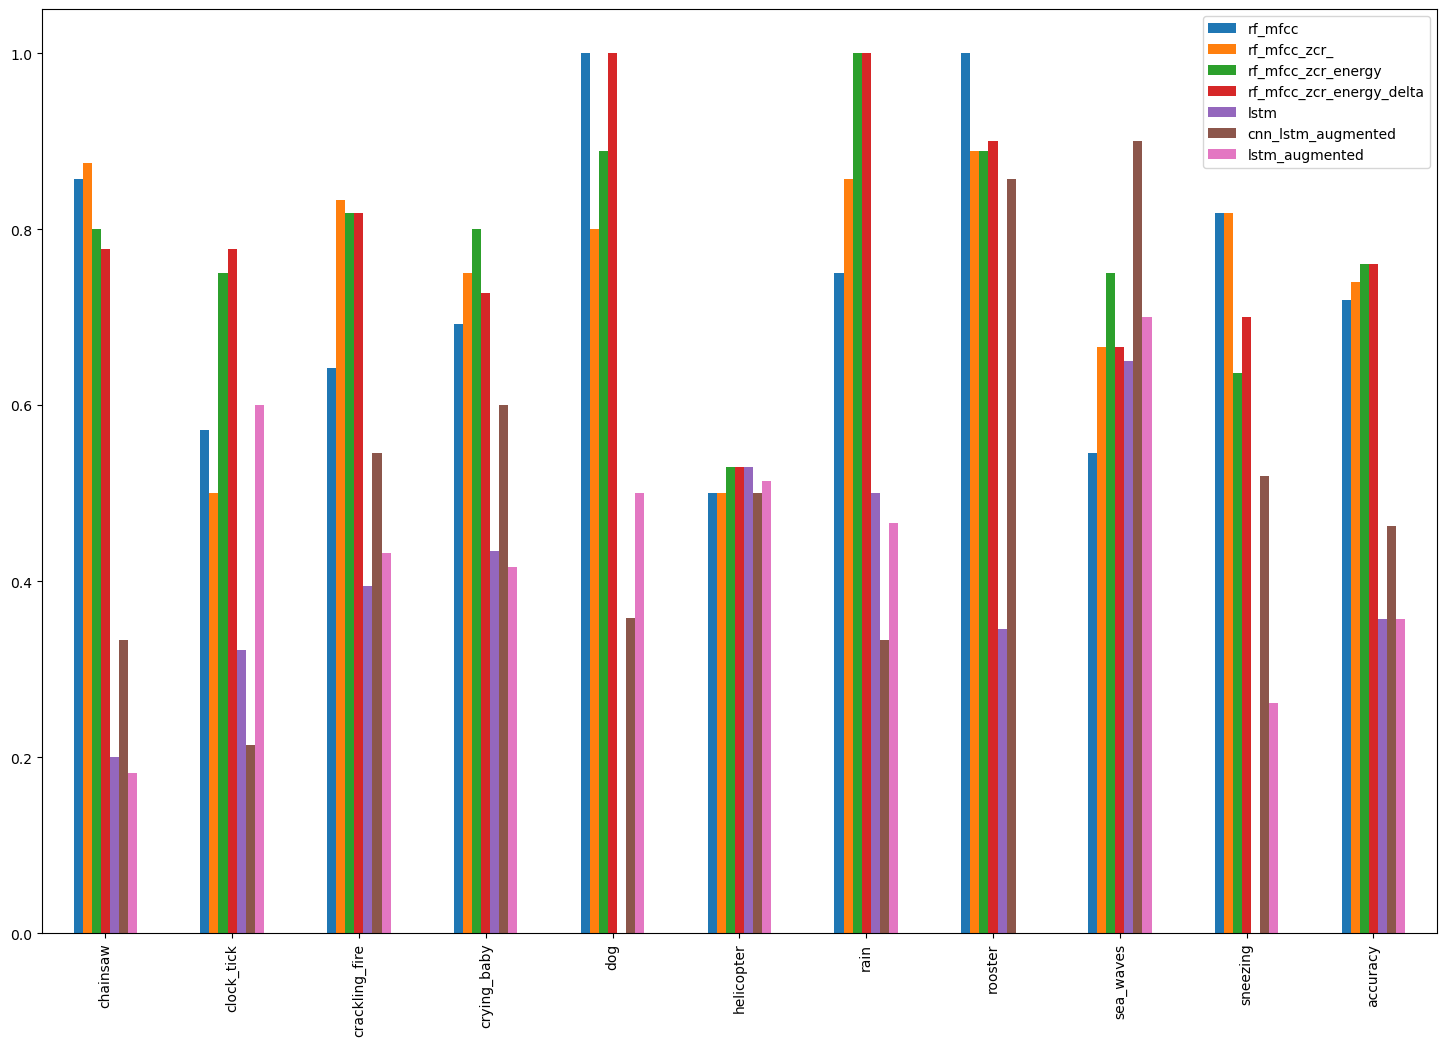

In [33]:
precision_plot(model_dict, figsize=(18, 12))

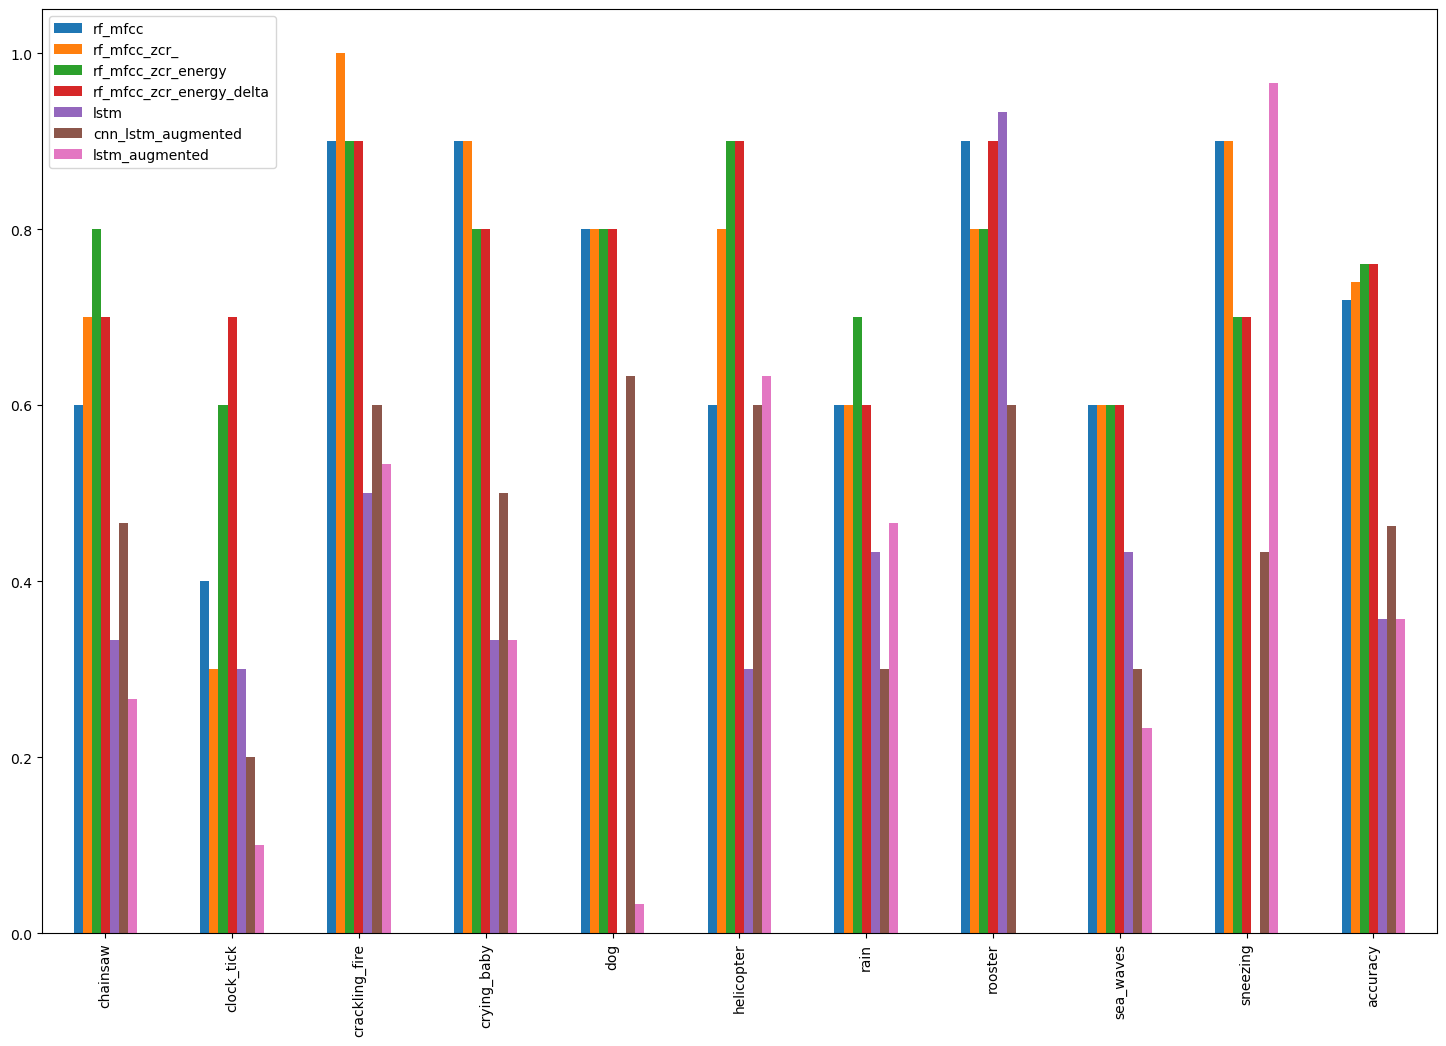

In [34]:
recall_plot(model_dict, figsize=(18, 12))

In [35]:
classes = model_dict['rnn']['encoder'].inverse_transform(np.diag([1] * 10)).reshape(-1)
model_dict['rnn']['y_true'] = pd.Series(model_dict['rnn']['y_true'].reshape(-1))

KeyError: 'rnn'

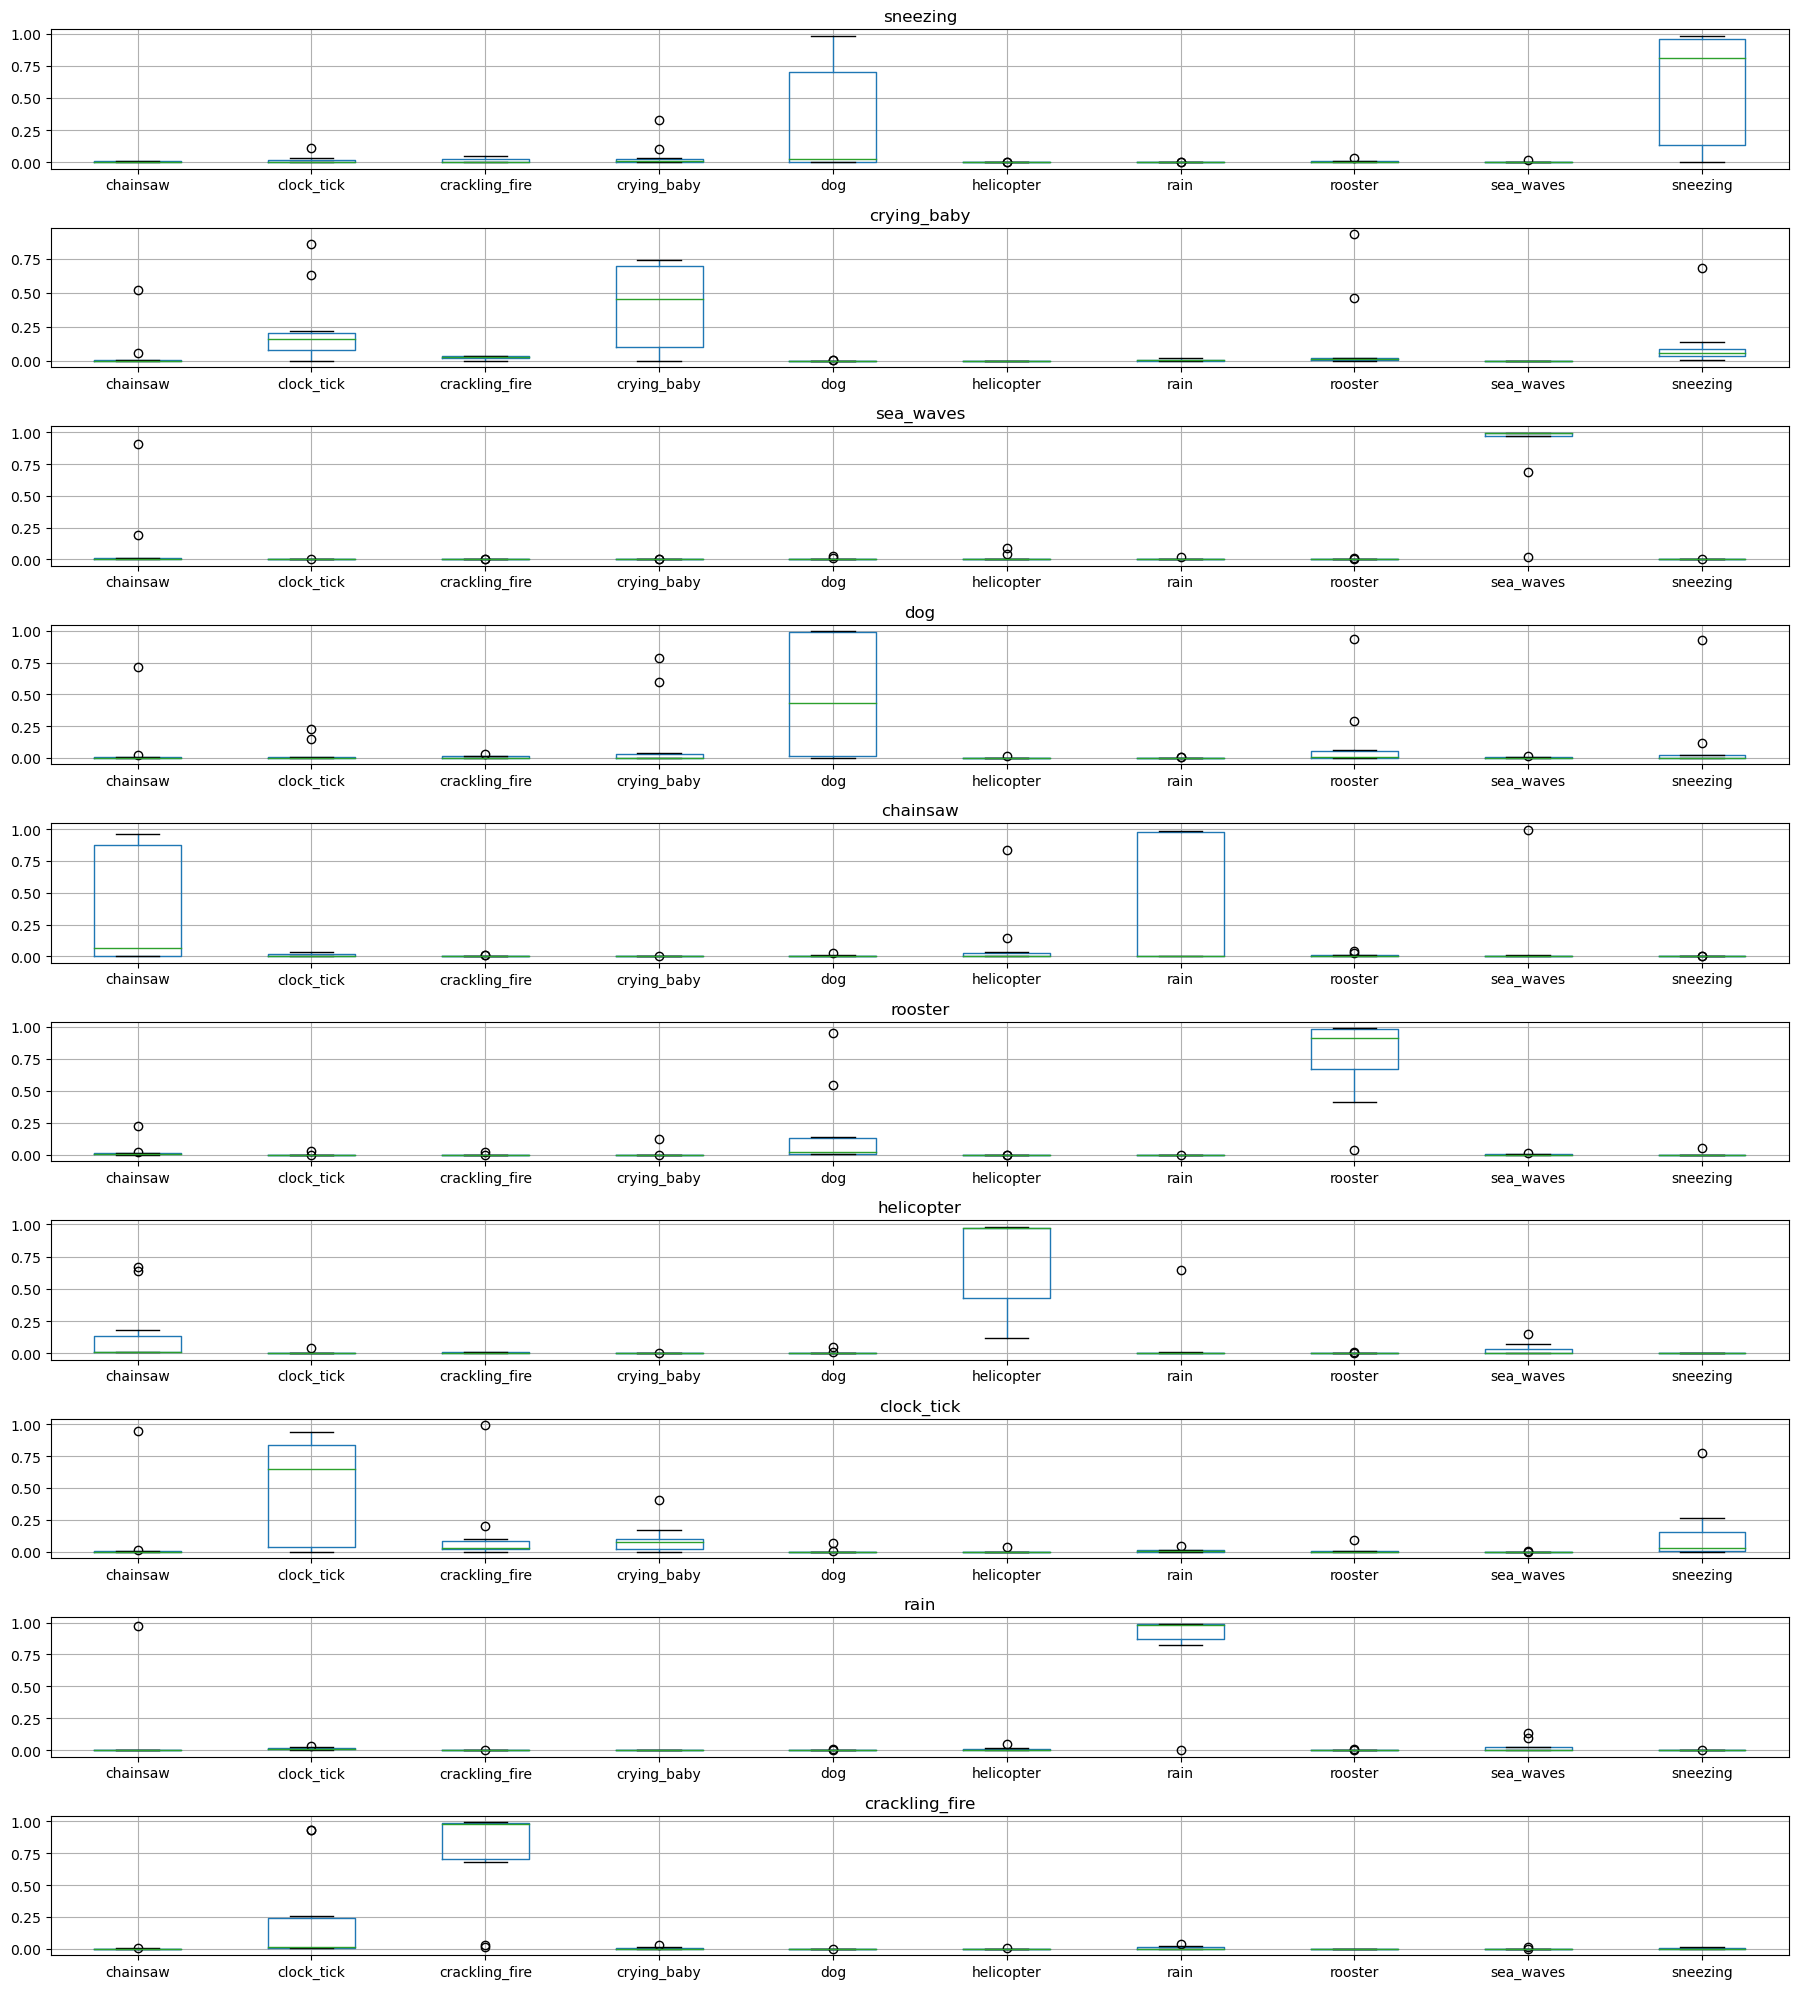

In [ ]:
probability_overview(model_dict['rnn'], classes, figsize=(18, 20))